## Graph Probability Density Function

In [1]:
## To DO

# Show how people generate z score table
# Show other uses of z score table similar to how people use it for the
# coursera class on it. 

# Explain how table works (if stuff works)

# Show boxplot and explain how it works. 

https://matplotlib.org/gallery/showcase/integral.html

Probability Density Functions (PDF) do NOT show you the probability of events but their probability density. This notebook will show you how you can use the PDF to find the probability for a given <b>range</b> of numbers. This is basically an explanation of why the graph below makes sense. 

![](images/NormalDistribution.png)

The probability density function of a normal distribution with a mean (insert mean symbol) and variance (insert variance symbol) is: (INSERT EQUATION HERE)

The probability density function of a normal distribution with mean of 0 and variance of 1 is: <br>

$$f(x) = \frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}$$

We will stick with this definition for this tutorial

In [2]:
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import pandas as pd
np.set_printoptions(suppress=True)

%matplotlib inline

In [3]:
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-np.linspace(-3, 3, num = 100)**2) / 2.0)  

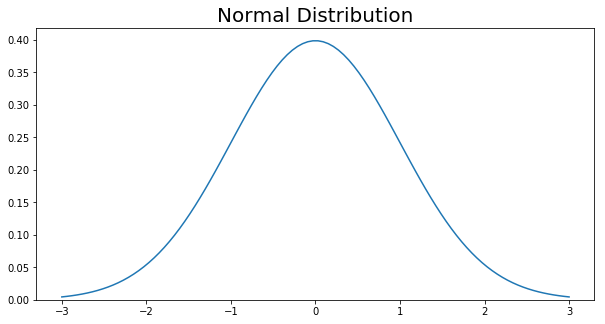

In [4]:
fig, ax = plt.subplots(figsize=(10, 5));

ax.plot(np.linspace(-3, 3, num = 100), pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);

For any PDF, the area under the curve must be 1 (the probability of drawing any number from the function's range is always 1). 

In [5]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

In [6]:
result, error = quad(normalProbabilityDensity, np.NINF, np.inf)

In [7]:
# Result should be very close to 1
result

0.9999999999999997

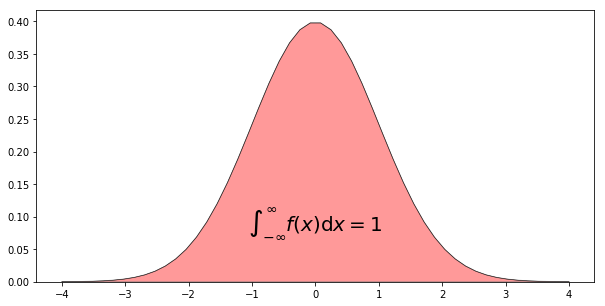

In [8]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 4 std deviations 
a, b = -4, 4 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(-4, 4)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-\infty}^{\infty} f(x)\mathrm{d}x = 1$",
         horizontalalignment='center', fontsize=20);

The area under the curve is 1. Lets break down the different parts of the graph. 

## Mean (0) to Mean + STD (1)

In [9]:
# Integrate normal distribution from 0 to 1
result, error = quad(normalProbabilityDensity, 0, 1, limit = 1000)

In [10]:
result

0.341344746068543

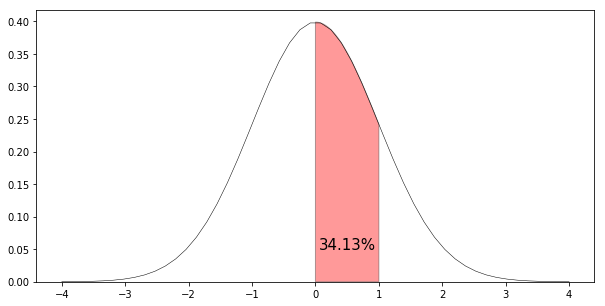

In [11]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 0, 1 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(0, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.5, .05, r'{0:.2f}%'.format(result*100),
         horizontalalignment='center', fontsize=15);

## Looking at Between 1 STD

In [12]:
result, error = quad(normalProbabilityDensity, -1, 1, limit = 1000)

In [13]:
result

0.682689492137086

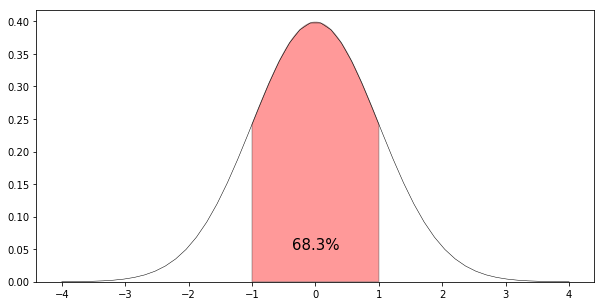

In [14]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = -1, 1 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(-1, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.0, .05, r'{0:.1f}%'.format(result*100),
         horizontalalignment='center', fontsize=15);

## (Mean + STD) to Mean + (2STD)

In [15]:
result, error = quad(normalProbabilityDensity, 1, 2, limit = 1000)

In [16]:
result

0.13590512198327784

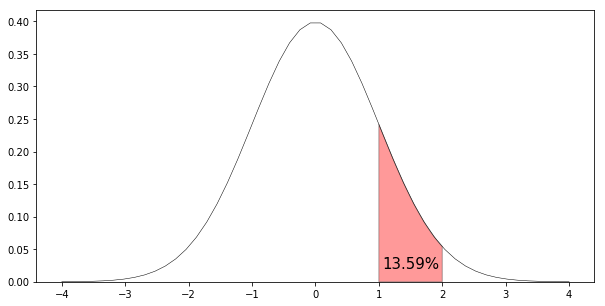

In [17]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 1, 2 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(1.5, .02, r'{0:.2f}%'.format(result*100),
         horizontalalignment='center', fontsize=15);

## (Mean + 2STD) to (Mean + 3STD)

In [18]:
result, error = quad(normalProbabilityDensity, 2, 3, limit = 1000)

In [19]:
result

0.02140023391654912

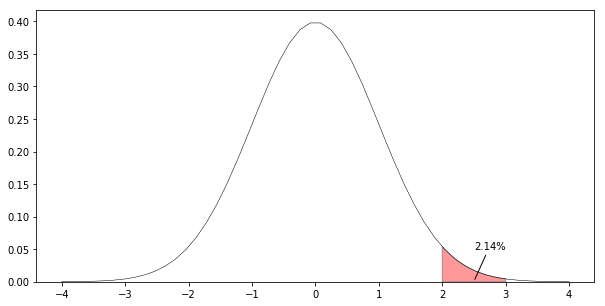

In [20]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 2, 3 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

#ax.text(1.5, .02, r'{0:.1f}%'.format(result*100),
#         horizontalalignment='center', fontsize=15);

ax.annotate(r'{0:.2f}%'.format(result*100),
            xy=(2.5, 0.001), xycoords='data',
            xytext=(2.5, 0.05), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            );

## (Mean + 3STD) to (Mean + 4STD)

In [21]:
result, error = quad(normalProbabilityDensity, 3, 4, limit = 1000)

In [22]:
result

0.0013182267897969746

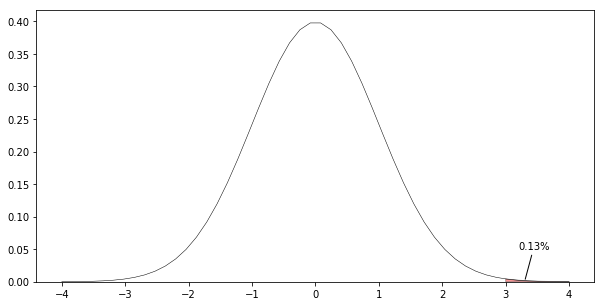

In [23]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 
a, b = 3, 4 # integral limits

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.annotate(r'{0:.2f}%'.format(result*100),
            xy=(3.3, 0.001), xycoords='data',
            xytext=(3.2, 0.05), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            );

## Mean + 4STD (4) to Infinity

This is the area under the curve that wont fit in my picture. Notice the probability is so small

In [24]:
result, error = quad(normalProbabilityDensity, 4, np.inf, limit = 1000)

In [25]:
result

3.1671241830206856e-05

## Lets put together the Entire Graph

If you think this is too much code, next section will make this better. 

In [26]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

In [27]:
# Area under curve for entire Graph
result, _ = quad(normalProbabilityDensity, np.NINF, np.inf)

# Integrate normal distribution from 0 to 1
result_0_1, _ = quad(normalProbabilityDensity, 0, 1, limit = 1000)

# Integrate normal distribution from -1 to 0
result_n1_0, _ = quad(normalProbabilityDensity, -1, 0, limit = 1000)

# Integrate normal distribution from 1 to 2
result_1_2, _ = quad(normalProbabilityDensity, 1, 2, limit = 1000)

# Integrate normal distribution from -2 to -1
result_n2_n1, _ = quad(normalProbabilityDensity, -2, -1, limit = 1000)

# Integrate normal distribution from 2 to 3
result_2_3, _ = quad(normalProbabilityDensity, 2, 3, limit = 1000)

# Integrate normal distribution from -3 to -2
result_n3_n2, _ = quad(normalProbabilityDensity, -3, -2, limit = 1000)

# Integrate normal distribution from 3 to 4
result_3_4, _ = quad(normalProbabilityDensity, 3, 4, limit = 1000)

# Integrate normal distribution from -4 to -3
result_n4_n3, _ = quad(normalProbabilityDensity, -4, -3, limit = 1000)

# Integrate normal distribution from 4 to inf
result_4_inf, error = quad(normalProbabilityDensity, 4, np.inf, limit = 1000)

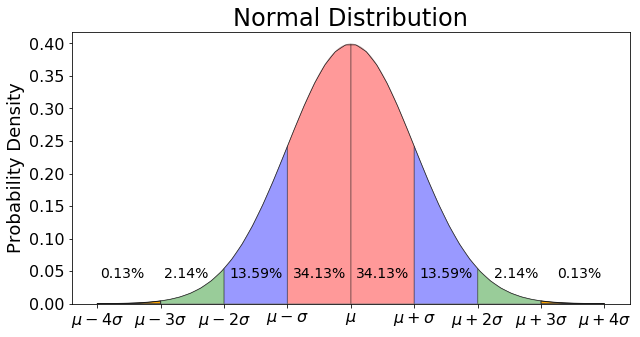

In [64]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 

x = np.linspace(-4, 4)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

#############################
a, b = 0, 1 # integral limits

# Make the shaded region
ix = np.linspace(0, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.5, .04, r'{0:.2f}%'.format(result_0_1*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = -1, 0 # integral limits

# Make the shaded region
ix = np.linspace(-1, 0)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-0.5, .04, r'{0:.2f}%'.format(result_n1_0*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 1, 2 # integral limits

# Make the shaded region
ix = np.linspace(1, 2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(1.5, .04, r'{0:.2f}%'.format(result_1_2*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = -2, -1 # integral limits

# Make the shaded region
ix = np.linspace(-2, -1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-1.5, .04, r'{0:.2f}%'.format(result_n2_n1*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 2, 3 # integral limits

# Make the shaded region
ix = np.linspace(2, 3)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(2.6, .04, r'{0:.2f}%'.format(result_2_3*100),
         horizontalalignment='center', fontsize=14);


##############################
a, b = -3, -2 # integral limits

# Make the shaded region
ix = np.linspace(-3, -2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(-2.6, .04, r'{0:.2f}%'.format(result_2_3*100),
         horizontalalignment='center', fontsize=14);

##############################
a, b = 3, 4 # integral limits

# Region from 3 to 4
ix = np.linspace(3, 4)
iy = normalProbabilityDensity(ix)
verts = [(3, 0)] + list(zip(ix, iy)) + [(4, 0)]
poly = Polygon(verts, facecolor='orange', edgecolor='.2', alpha = 1)
ax.add_patch(poly);

ax.text(3.6, .04, r'{0:.2f}%'.format(result_3_4*100),
         horizontalalignment='center', fontsize=14);

# Region from -4 to -3
ix = np.linspace(-4, -3)
iy = normalProbabilityDensity(ix)
verts = [(-4, 0)] + list(zip(ix, iy)) + [(-3, 0)]
poly = Polygon(verts, facecolor='orange', edgecolor='.2', alpha = 1)
ax.add_patch(poly);

ax.text(-3.6, .040, r'{0:.2f}%'.format(result_n4_n3*100),
         horizontalalignment='center', fontsize=14);

ax.set_title(r'Normal Distribution', fontsize = 24)
ax.set_ylabel(r'Probability Density', fontsize = 18)

xTickLabels = ['',
               r'$\mu - 4\sigma$',
               r'$\mu - 3\sigma$',
               r'$\mu - 2\sigma$',
               r'$\mu - \sigma$',
               r'$\mu$',
               r'$\mu + \sigma$',
               r'$\mu + 2\sigma$',
               r'$\mu + 3\sigma$',
               r'$\mu + 4\sigma$']

yTickLabels = ['0.00',
               '0.05',
               '0.10',
               '0.15',
               '0.20',
               '0.25',
               '0.30',
               '0.35',
               '0.40']

ax.set_xticklabels(xTickLabels, fontsize = 16)

ax.set_yticklabels(yTickLabels, fontsize = 16)



fig.savefig('images/NormalDistribution.png', dpi = 1200)

## 68-95-99.7 Rule

Most people commonly associate the normal distribution with the 68-95-99.7 rule where 68% of the data is within 1 standard deviation (σ) of the mean (μ), 95% of the data is within 2 standard deviations (σ) of the mean  (μ), and 99.7% of the data is within 3 standard deviations (σ) of the mean  (μ). The graph below shows that. 

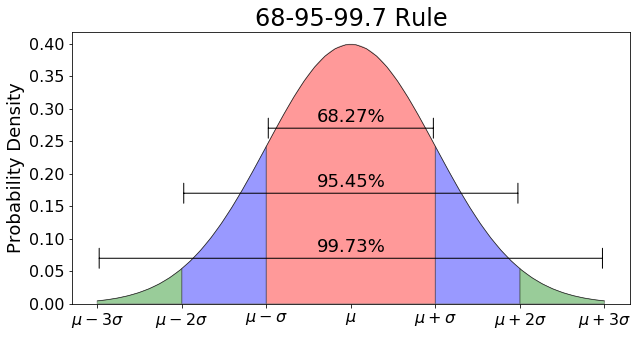

In [63]:
# This should really be -inf to positive inf, but graph can only be so big. 
# Currently it is plus or minus 5 std deviations 

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

#############################
a, b = -1, 1 # integral limits

# Make the shaded region
ix = np.linspace(-1, 1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0.0, .28, r'{0:.2f}%'.format((result_n1_0 + result_0_1)*100),
         horizontalalignment='center', fontsize=18);

##############################
# Bounding the make arrow 
ax.annotate(r'',
            xy=(-1, .27), xycoords='data',
            xytext=(1, .27), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

##############################
a, b = 1, 2 # integral limits

# Make the shaded region
ix = np.linspace(1, 2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

##############################
a, b = -2, -1 # integral limits

# Make the shaded region
ix = np.linspace(-2, -1)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

#ax.text(-1.5, .04, r'{0:.2f}%'.format(result_n2_n1*100),
#         horizontalalignment='center', fontsize=14);

ax.text(0.0, .18, r'{0:.2f}%'.format((result_n2_n1 + result_n1_0 + result_0_1 + result_1_2)*100),
         horizontalalignment='center', fontsize=18);

##############################
# Bounding the make arrow 
ax.annotate(r'',
            xy=(-2, .17), xycoords='data',
            xytext=(2, .17), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

##############################
a, b = 2, 3 # integral limits

# Make the shaded region
ix = np.linspace(2, 3)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

##############################
a, b = -3, -2 # integral limits

# Make the shaded region
ix = np.linspace(-3, -2)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

### This is the middle part
ax.text(0.0, .08, r'{0:.2f}%'.format((result_n3_n2 + result_n2_n1 + result_n1_0 + result_0_1 + result_1_2 + result_2_3)*100),
         horizontalalignment='center', fontsize=18);

# Bounding the make arrow 
ax.annotate(r'',
            xy=(-3, .07), xycoords='data',
            xytext=(3, .07), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

ax.set_title(r'68-95-99.7 Rule', fontsize = 24)
ax.set_ylabel(r'Probability Density', fontsize = 18)

xTickLabels = ['',
               r'$\mu - 3\sigma$',
               r'$\mu - 2\sigma$',
               r'$\mu - \sigma$',
               r'$\mu$',
               r'$\mu + \sigma$',
               r'$\mu + 2\sigma$',
               r'$\mu + 3\sigma$']

yTickLabels = ['0.00',
               '0.05',
               '0.10',
               '0.15',
               '0.20',
               '0.25',
               '0.30',
               '0.35',
               '0.40']

ax.set_xticklabels(xTickLabels, fontsize = 16)

ax.set_yticklabels(yTickLabels, fontsize = 16)

fig.savefig('images/68_95_99_rule.png', dpi = 1200)

## Normal Distribution

In [29]:
# Draw samples from normal distribution
# Mean is 0 
# Std is 1
mu, sigma = 0, 1

myNormalDistribution = np.random.normal(mu, sigma,  100000000)

# Mean is close to Zero
mean = myNormalDistribution.mean()
standardDeviation = myNormalDistribution.std()
print('mean: ', int(mean))

# Standard deviation and variance is 1
print('std: ', int(standardDeviation))

## Show new graph with mean 0 and standard deviation of 1 
## because needed for showing how z table is calculated and show new graph
## before integrating. 

('mean: ', 0)
('std: ', 0)


## Generate the Z-Score Table

Need to look up pretty looking tables and make one myself using integrals and show it finally in pandas arrays. 

https://en.wikipedia.org/wiki/Standard_normal_table 

Mention https://en.wikipedia.org/wiki/68–95–99.7_rule somewhere in article about it

In [49]:
pd.DataFrame(data = np.zeros((40, 10)), columns = np.li )

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
len(np.linspace(.00, 4, num = 401))

401

In [55]:
np.zeros(401)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [73]:
standardNormalTable = [np.nan] * 40001

for index, upperLimit in enumerate(np.linspace(.00, 4, num = 40001)):
    result, _ = quad(normalProbabilityDensity, 0, upperLimit, limit = 1000)
    standardNormalTable[index] = [upperLimit, result]

In [75]:
pd.DataFrame(data = standardNormalTable)

,0,1
0,0.0000,0.000000
1,0.0001,0.000040
2,0.0002,0.000080
3,0.0003,0.000120
4,0.0004,0.000160
5,0.0005,0.000199
6,0.0006,0.000239
7,0.0007,0.000279
8,0.0008,0.000319
9,0.0009,0.000359


In [62]:
np.linspace(.00, 4, num = 4001)

4001

In [42]:
%%time

# Mention how slow this is



# Integrate normal distribution from 0 to 1
result_0_1, _ = quad(normalProbabilityDensity, 0, 1, limit = 1000)


np.linspace(.00, 4, num = 401)

CPU times: user 77 µs, sys: 11 µs, total: 88 µs
Wall time: 83.2 µs


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [ ]:
# 0 to something. 

# Integrate normal distribution from 0 to 1


for 
result_0_1, _ = quad(normalProbabilityDensity, 0, 1, limit = 1000)

## Now lets look at Box Plots

## Stack Overflow

Good Explanation of probability density function: https://math.stackexchange.com/questions/2095323/probability-density-function-graph

https://math.stackexchange.com/questions/1394789/how-to-calculate-probability-with-z-score-not-on-table

normal distribution: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html

python area under the curve: https://matplotlib.org/gallery/showcase/integral.html

something similar to this in R: https://qualityandinnovation.com/2017/02/02/where-do-z-score-tables-come-from-how-to-make-them-in-r/